In [6]:
import pandas as pd
import numpy as np

from src.data import read_dataset, clean_dataset
from src.stats.statFunc import *
from src.visualization.create_vis import *

# Importing the Data

In [2]:
data = read_dataset.read_fem_preg('../data/external/2002FemPreg.dct',
                                  '../data/external/2002FemPreg.dat')
clean_dataset.clean_fem_preg(data)

data

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [3]:
data.outcome[read_dataset.make_preg_map(data)[10229]]

11093    4
11094    4
11095    4
11096    4
11097    4
11098    4
11099    1
Name: outcome, dtype: int64

In [4]:
live = data[data['outcome'] == 1]
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,1234,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,1234,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [5]:
hist = Histogram(live.birthwgt_lb)
hist.d

{7.0: 3054,
 6.0: 2240,
 8.0: 1899,
 5.0: 701,
 9.0: 623,
 4.0: 229,
 10.0: 132,
 3.0: 98,
 2.0: 53,
 1.0: 40,
 11.0: 26,
 12.0: 10,
 0.0: 8,
 14.0: 3,
 13.0: 3,
 51.0: 1,
 15.0: 1}

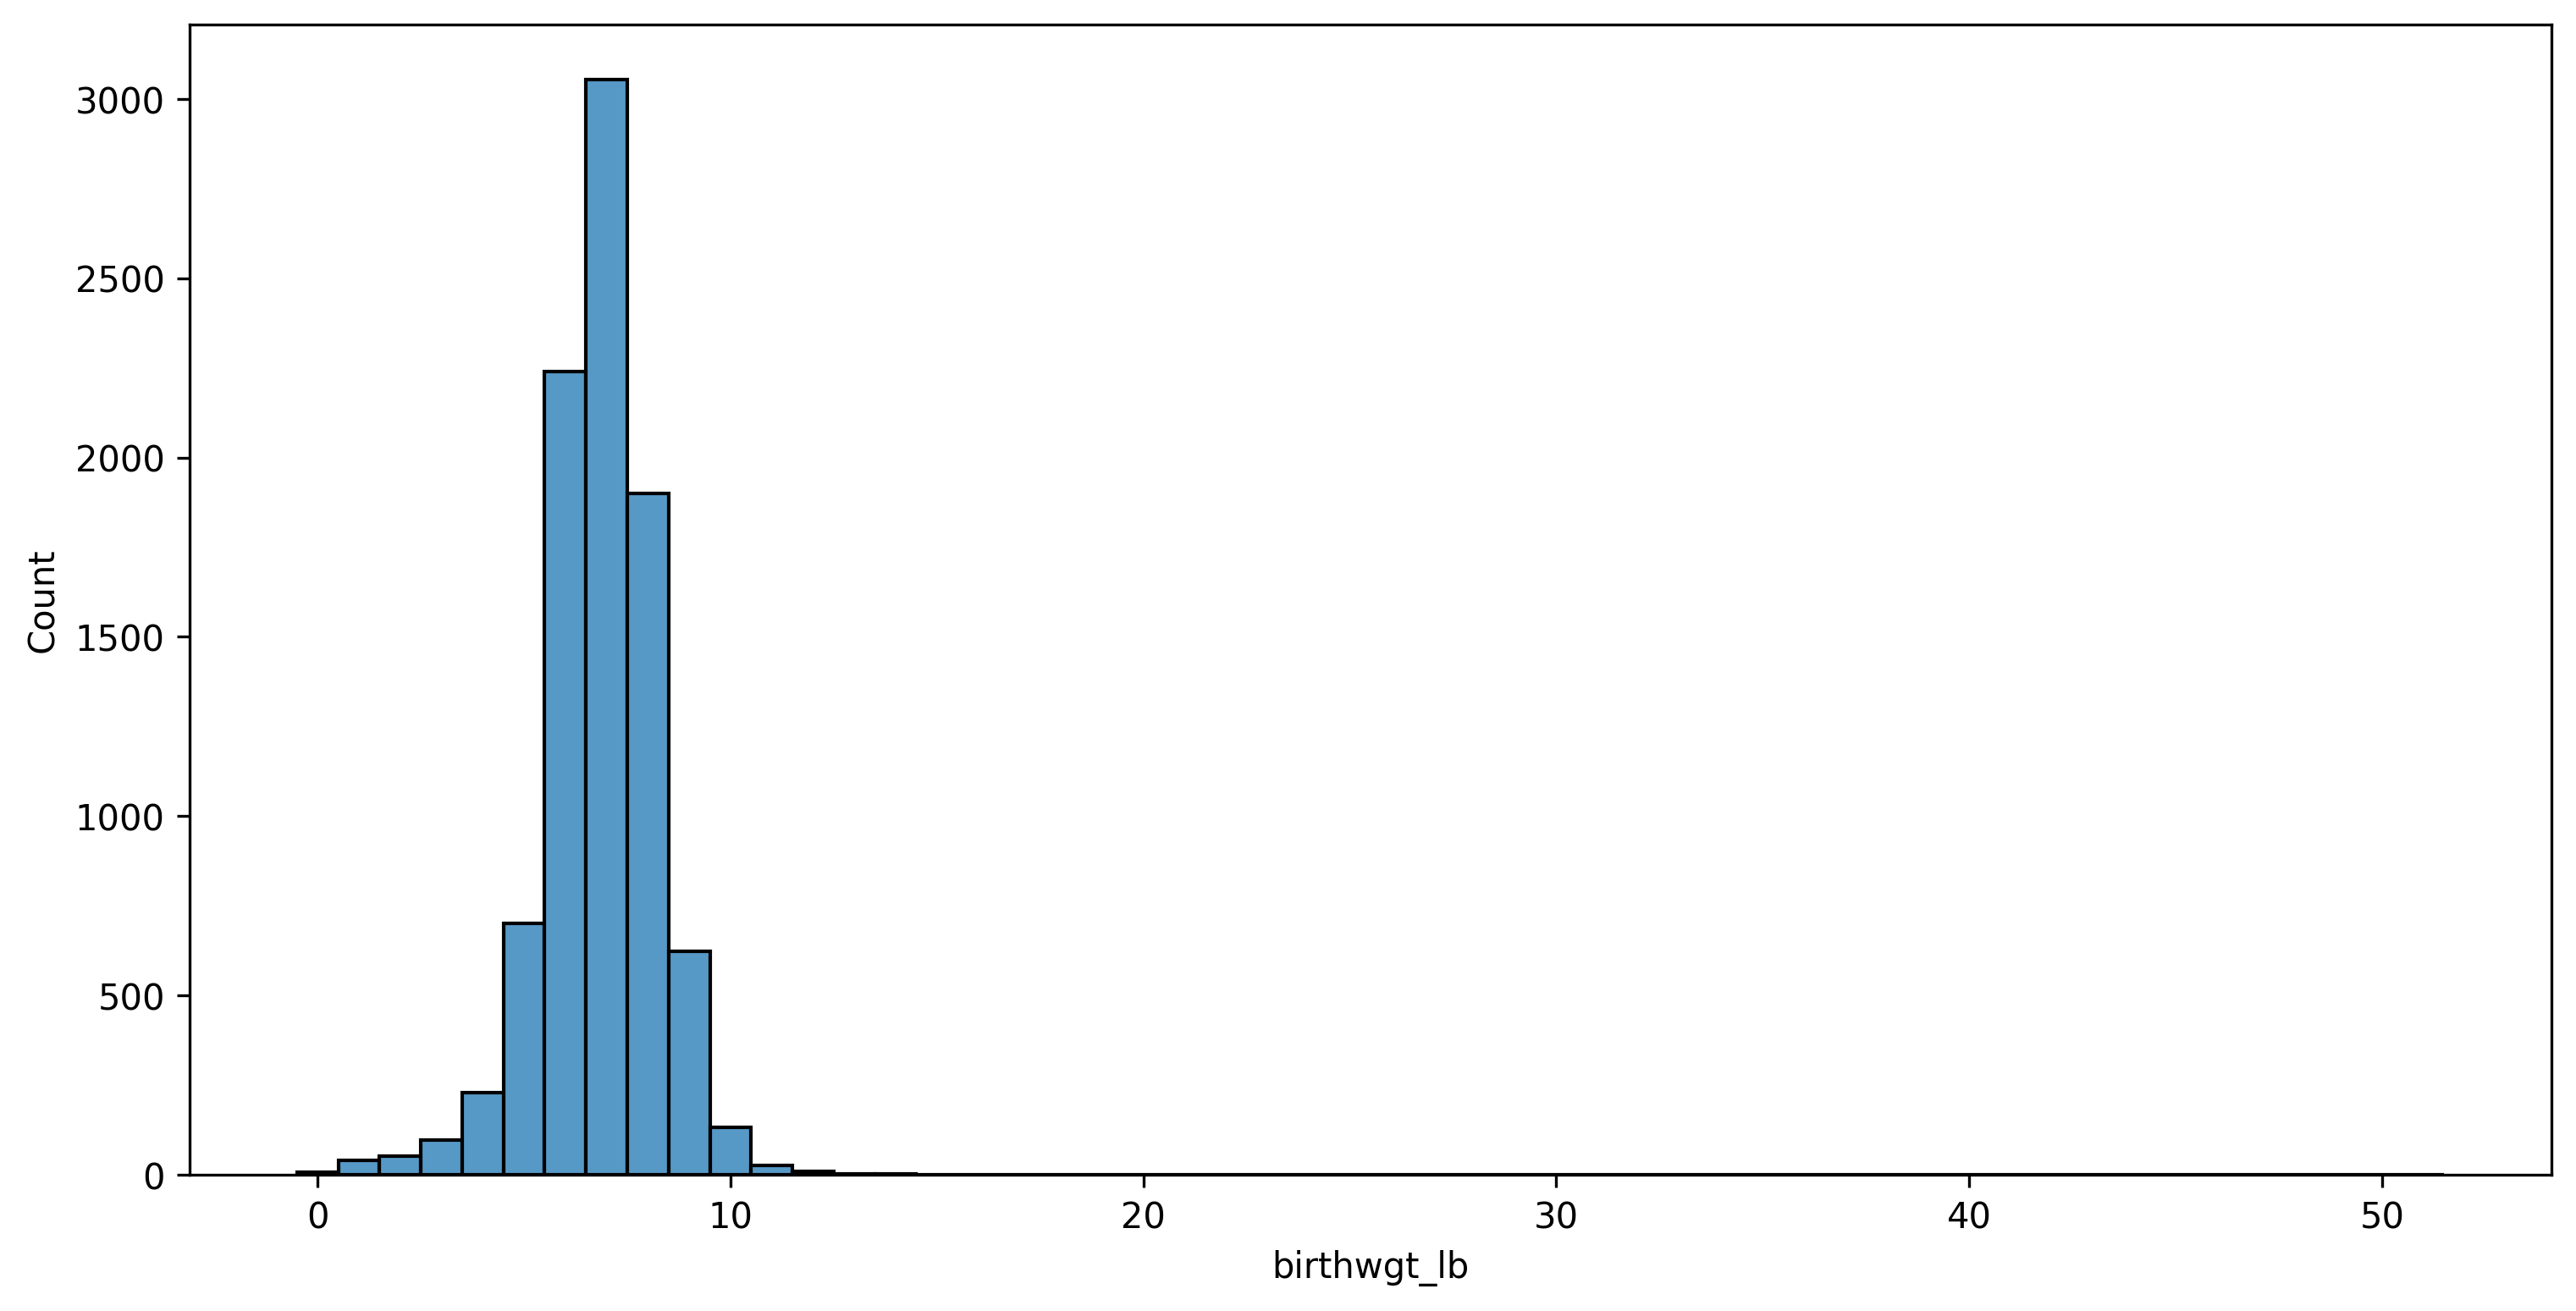

In [7]:
plot_hist(live.birthwgt_lb, discrete=True)

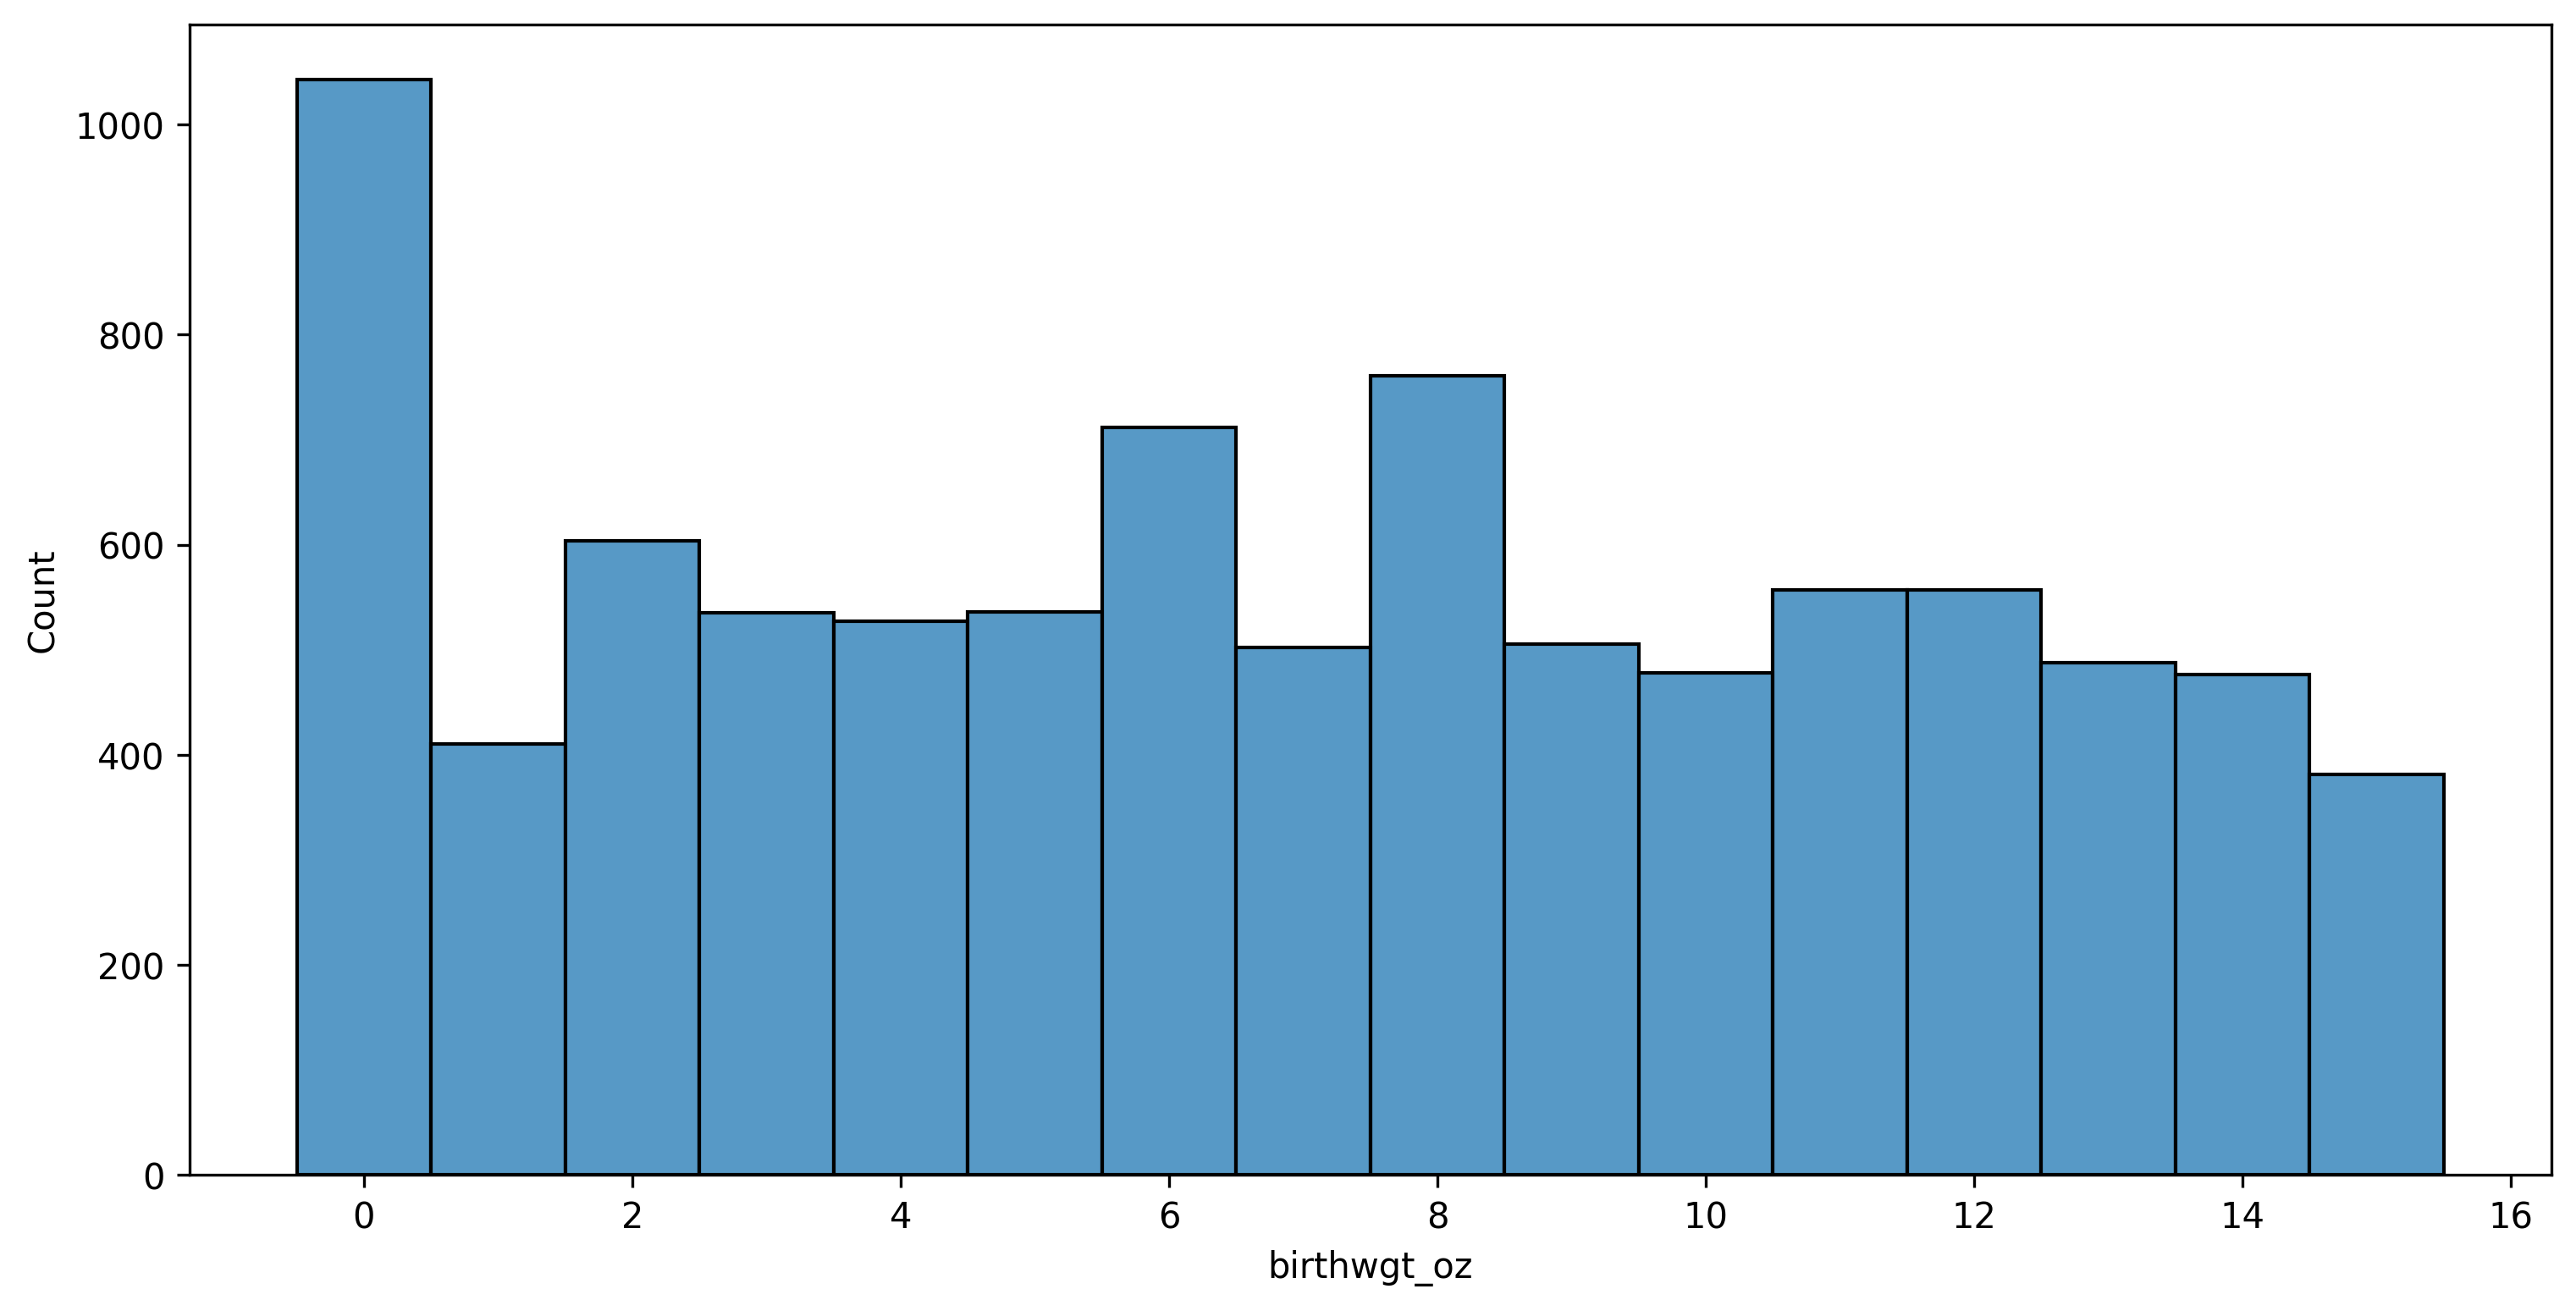

In [8]:
plot_hist(live.birthwgt_oz)

0 is more common than other values and 1, 15 are less common probably because respondent round
value to close to an integer value.

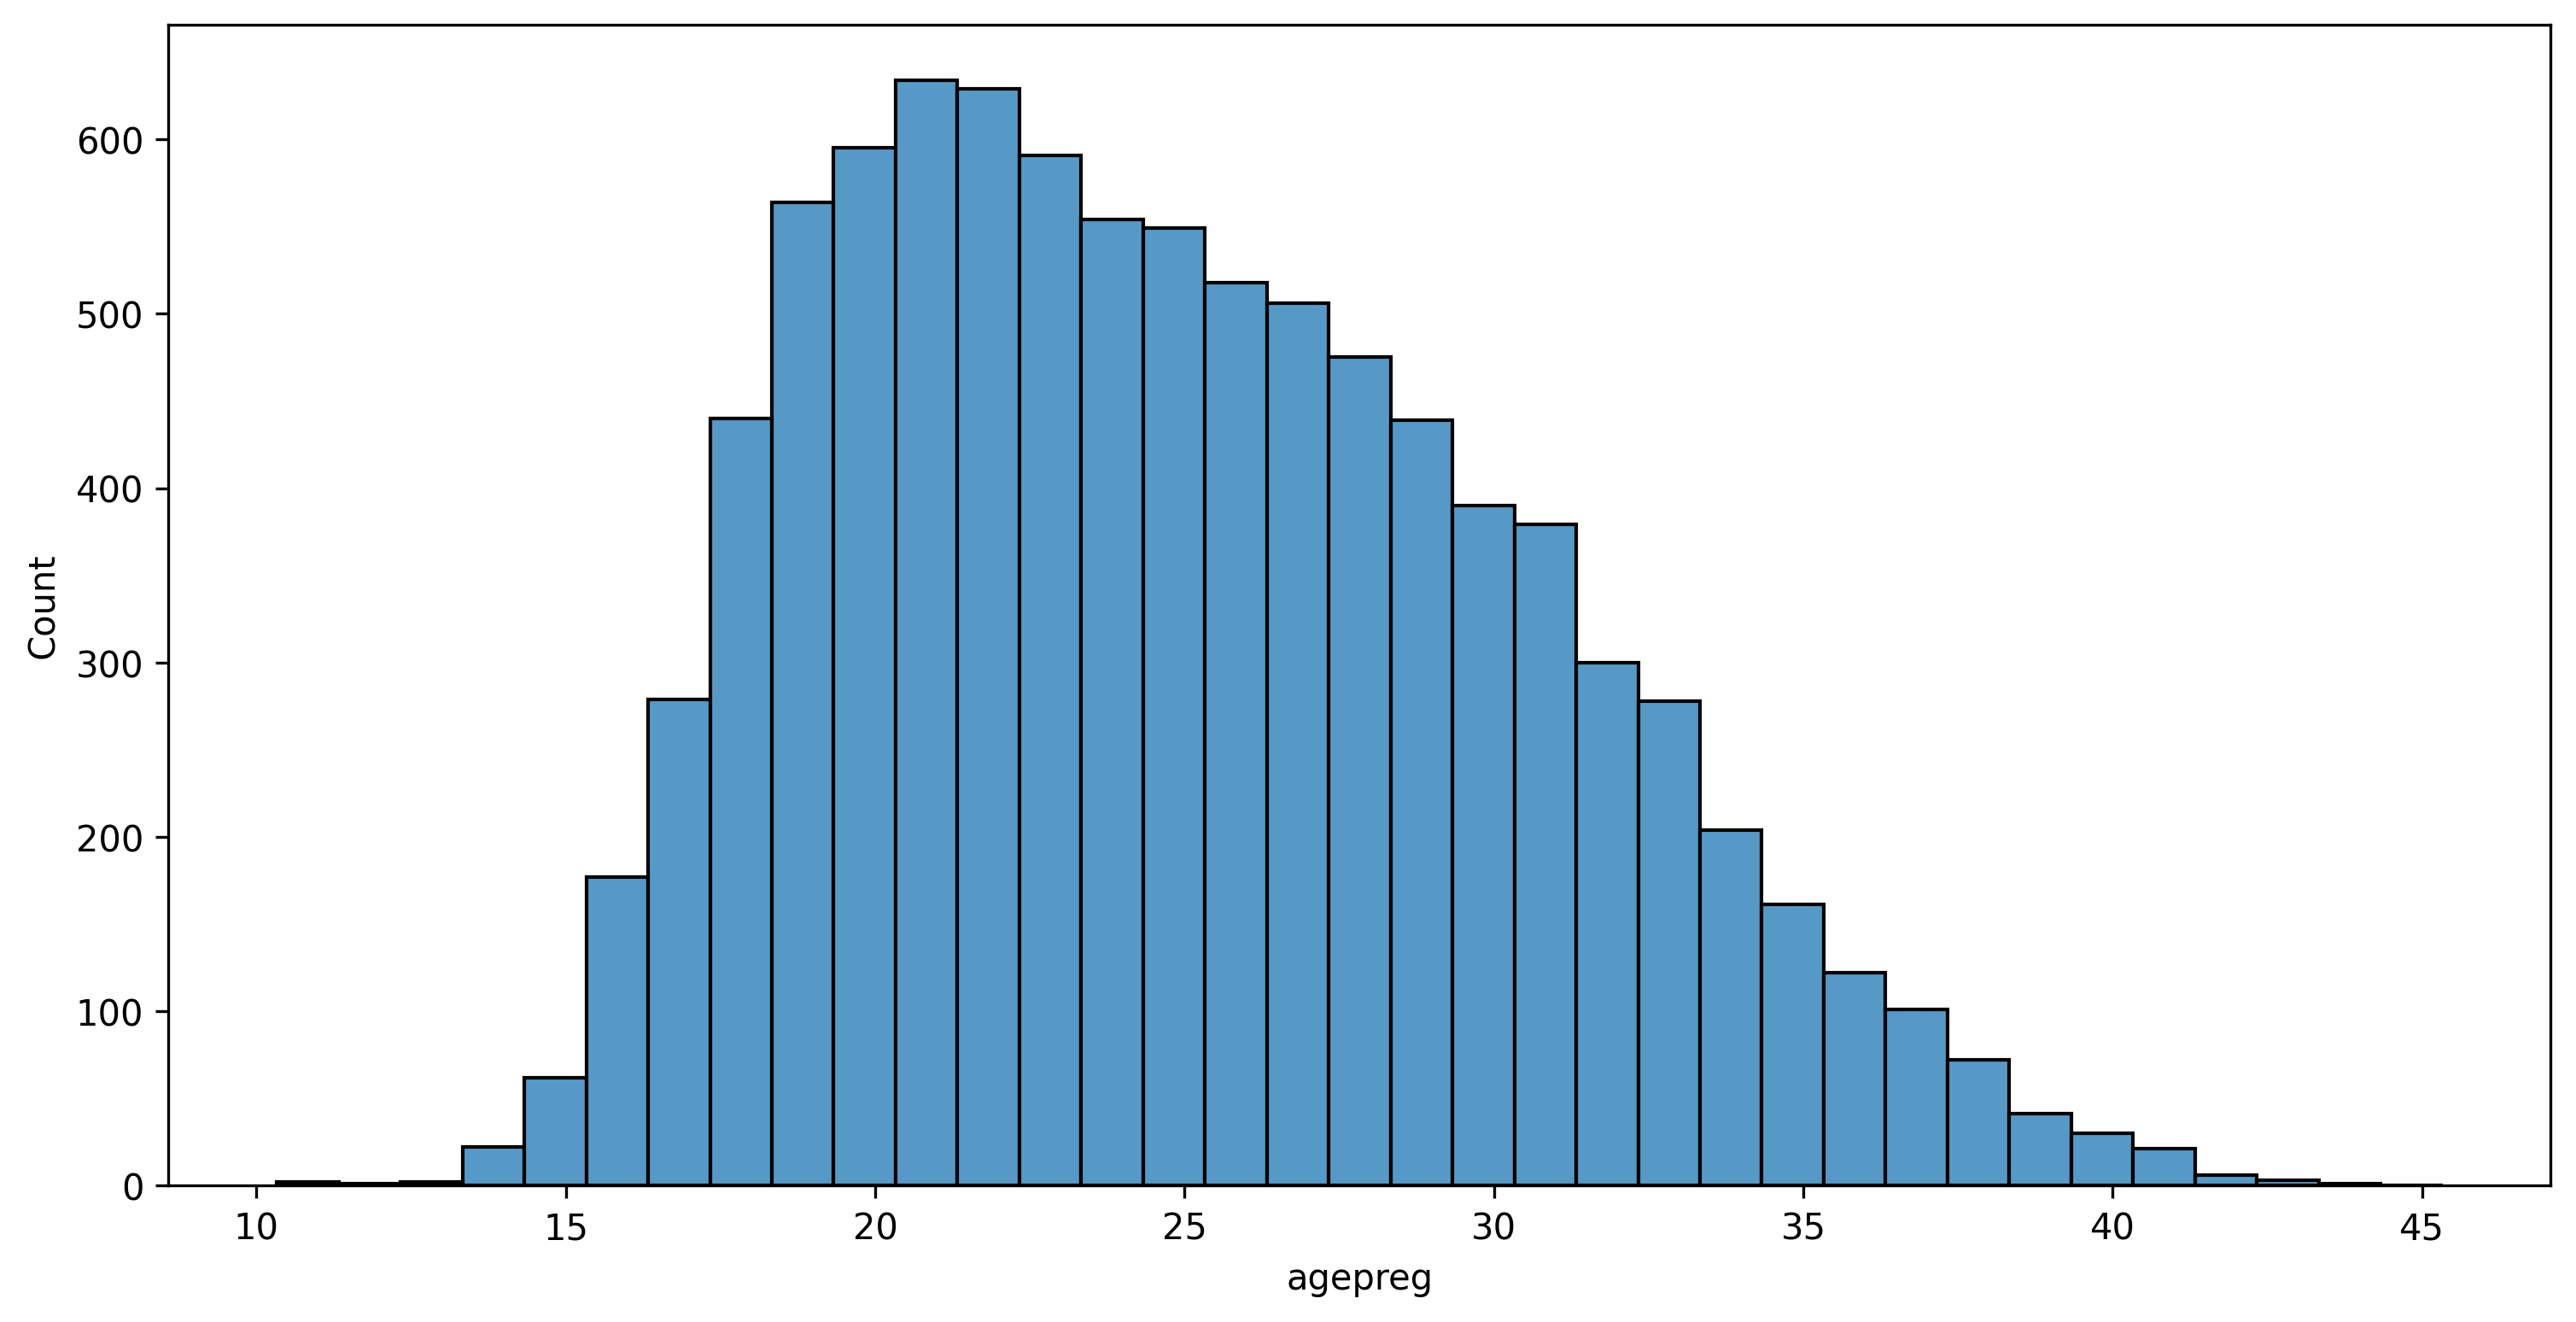

In [9]:
plot_hist(live.agepreg)

distribution is very roughly bell-shaped but tail extend right than left. most mothers are in their 20s fewer in their 30s.

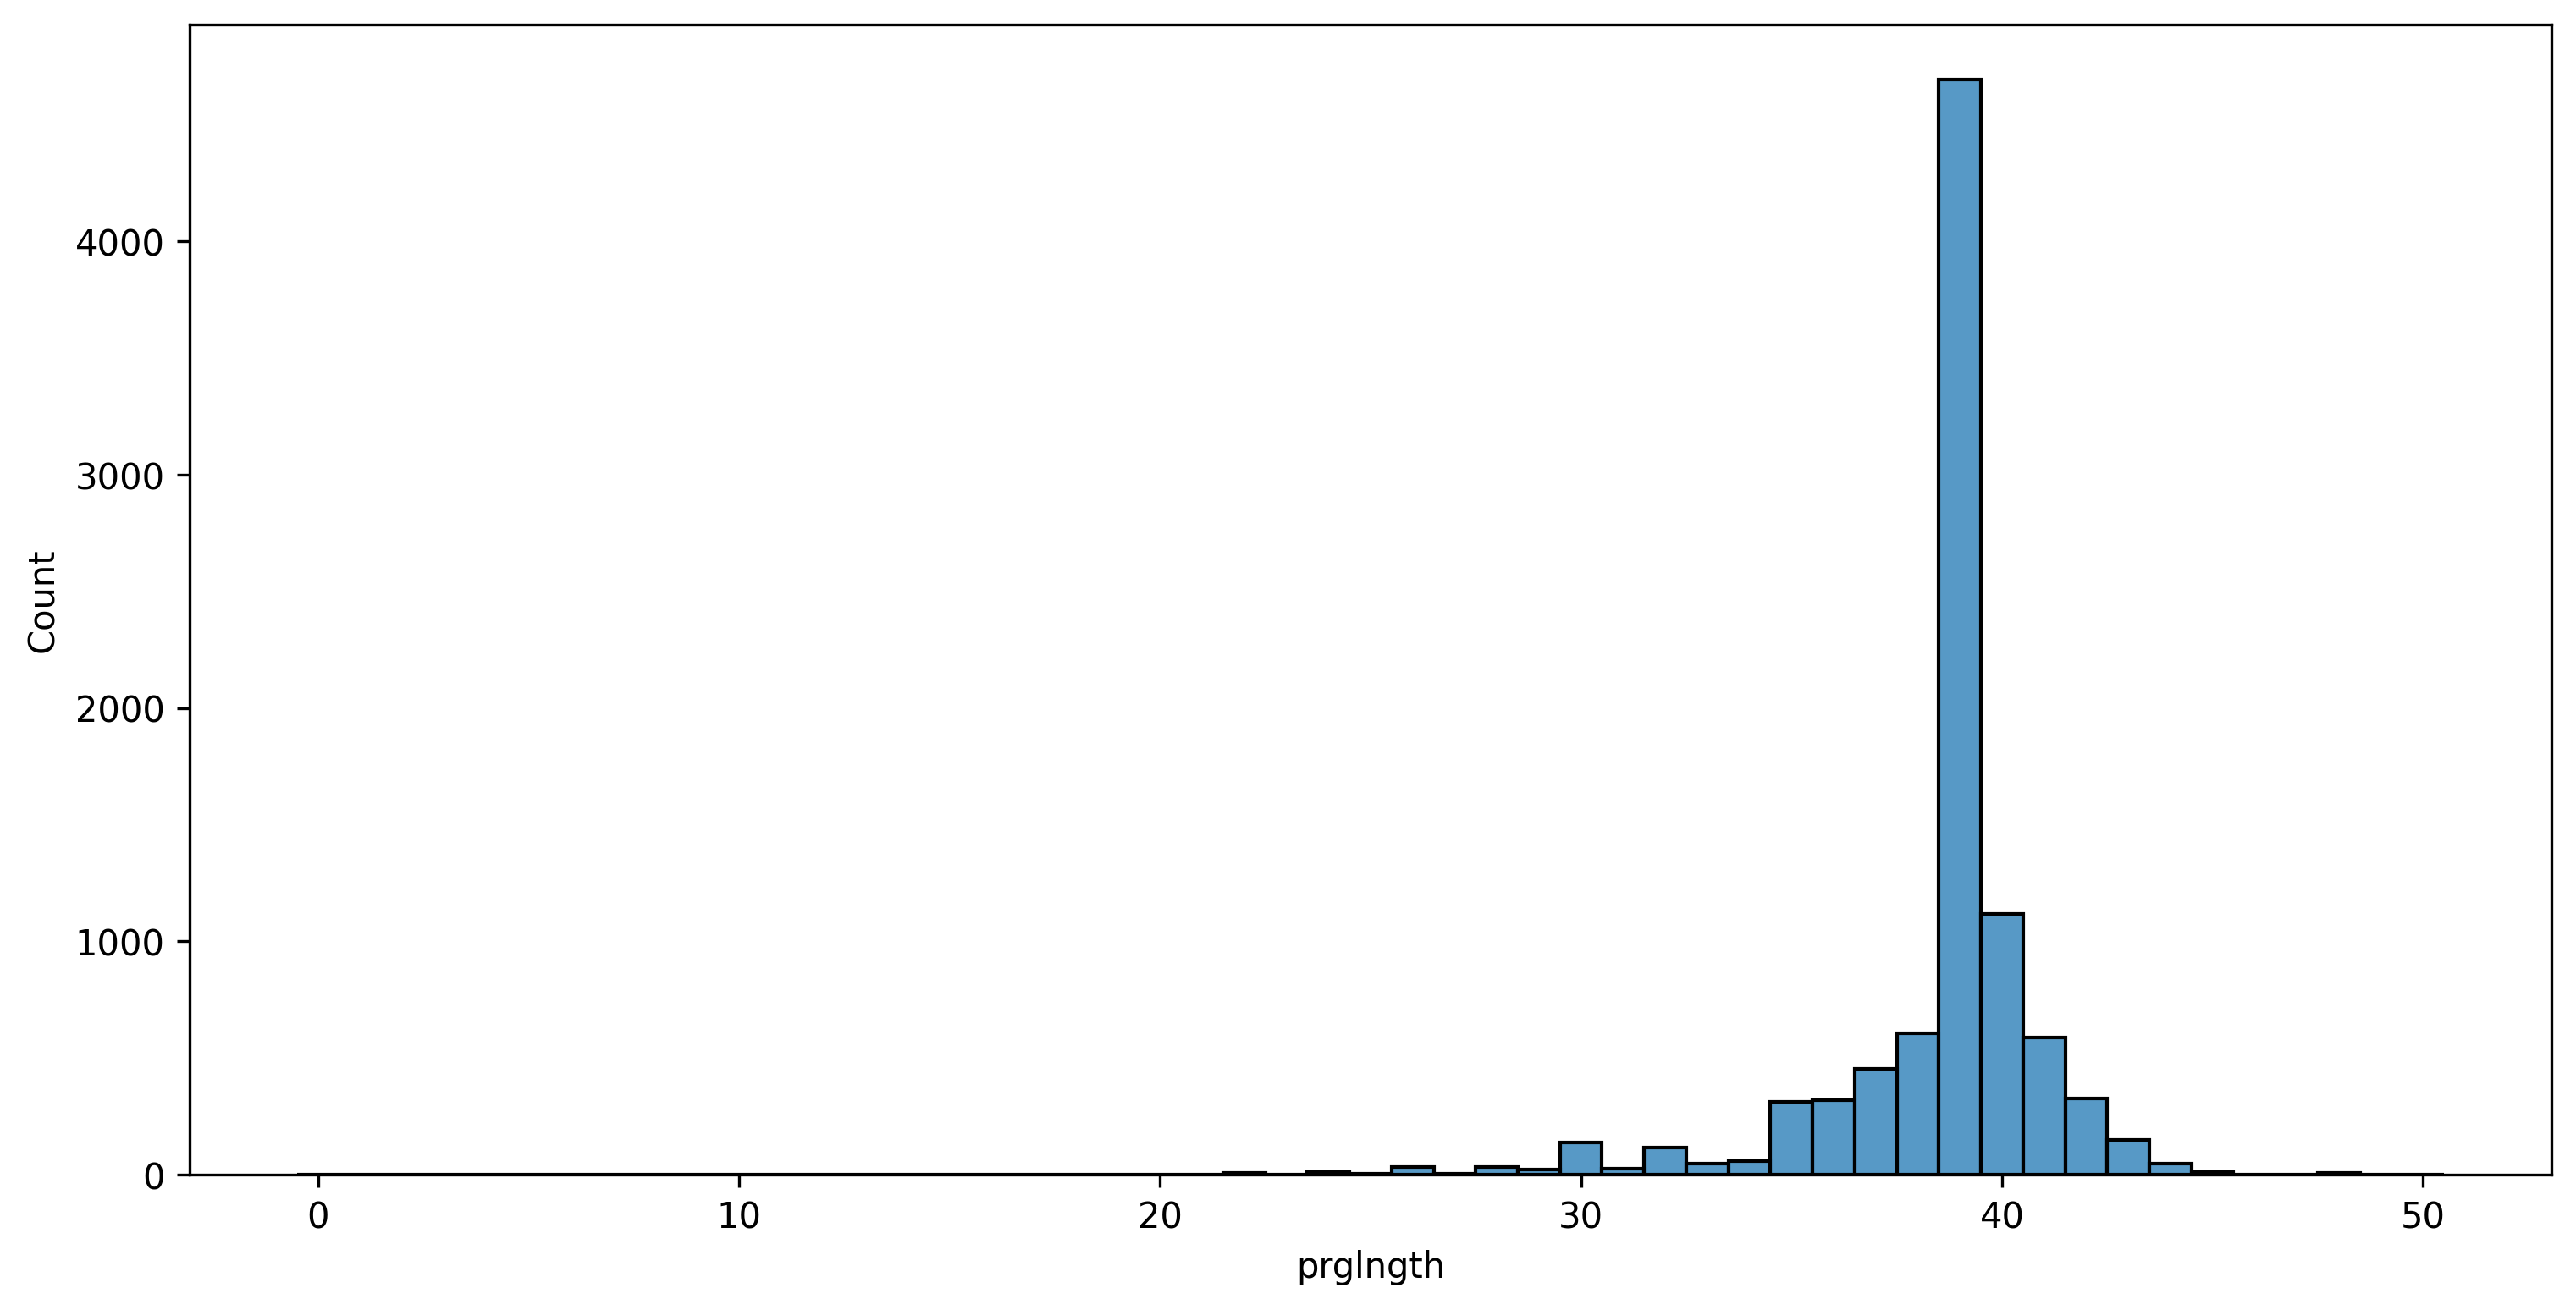

In [10]:
plot_hist(live.prglngth)

by far the most common value is 39 weeks. left tail is longer than right.

### First babies

In [11]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

firsts_hist = Histogram(firsts.prglngth)
others_hist = Histogram(others.prglngth)

In [12]:
firsts_hist.sum_()

4413

In [13]:
others_hist.sum_()

4735

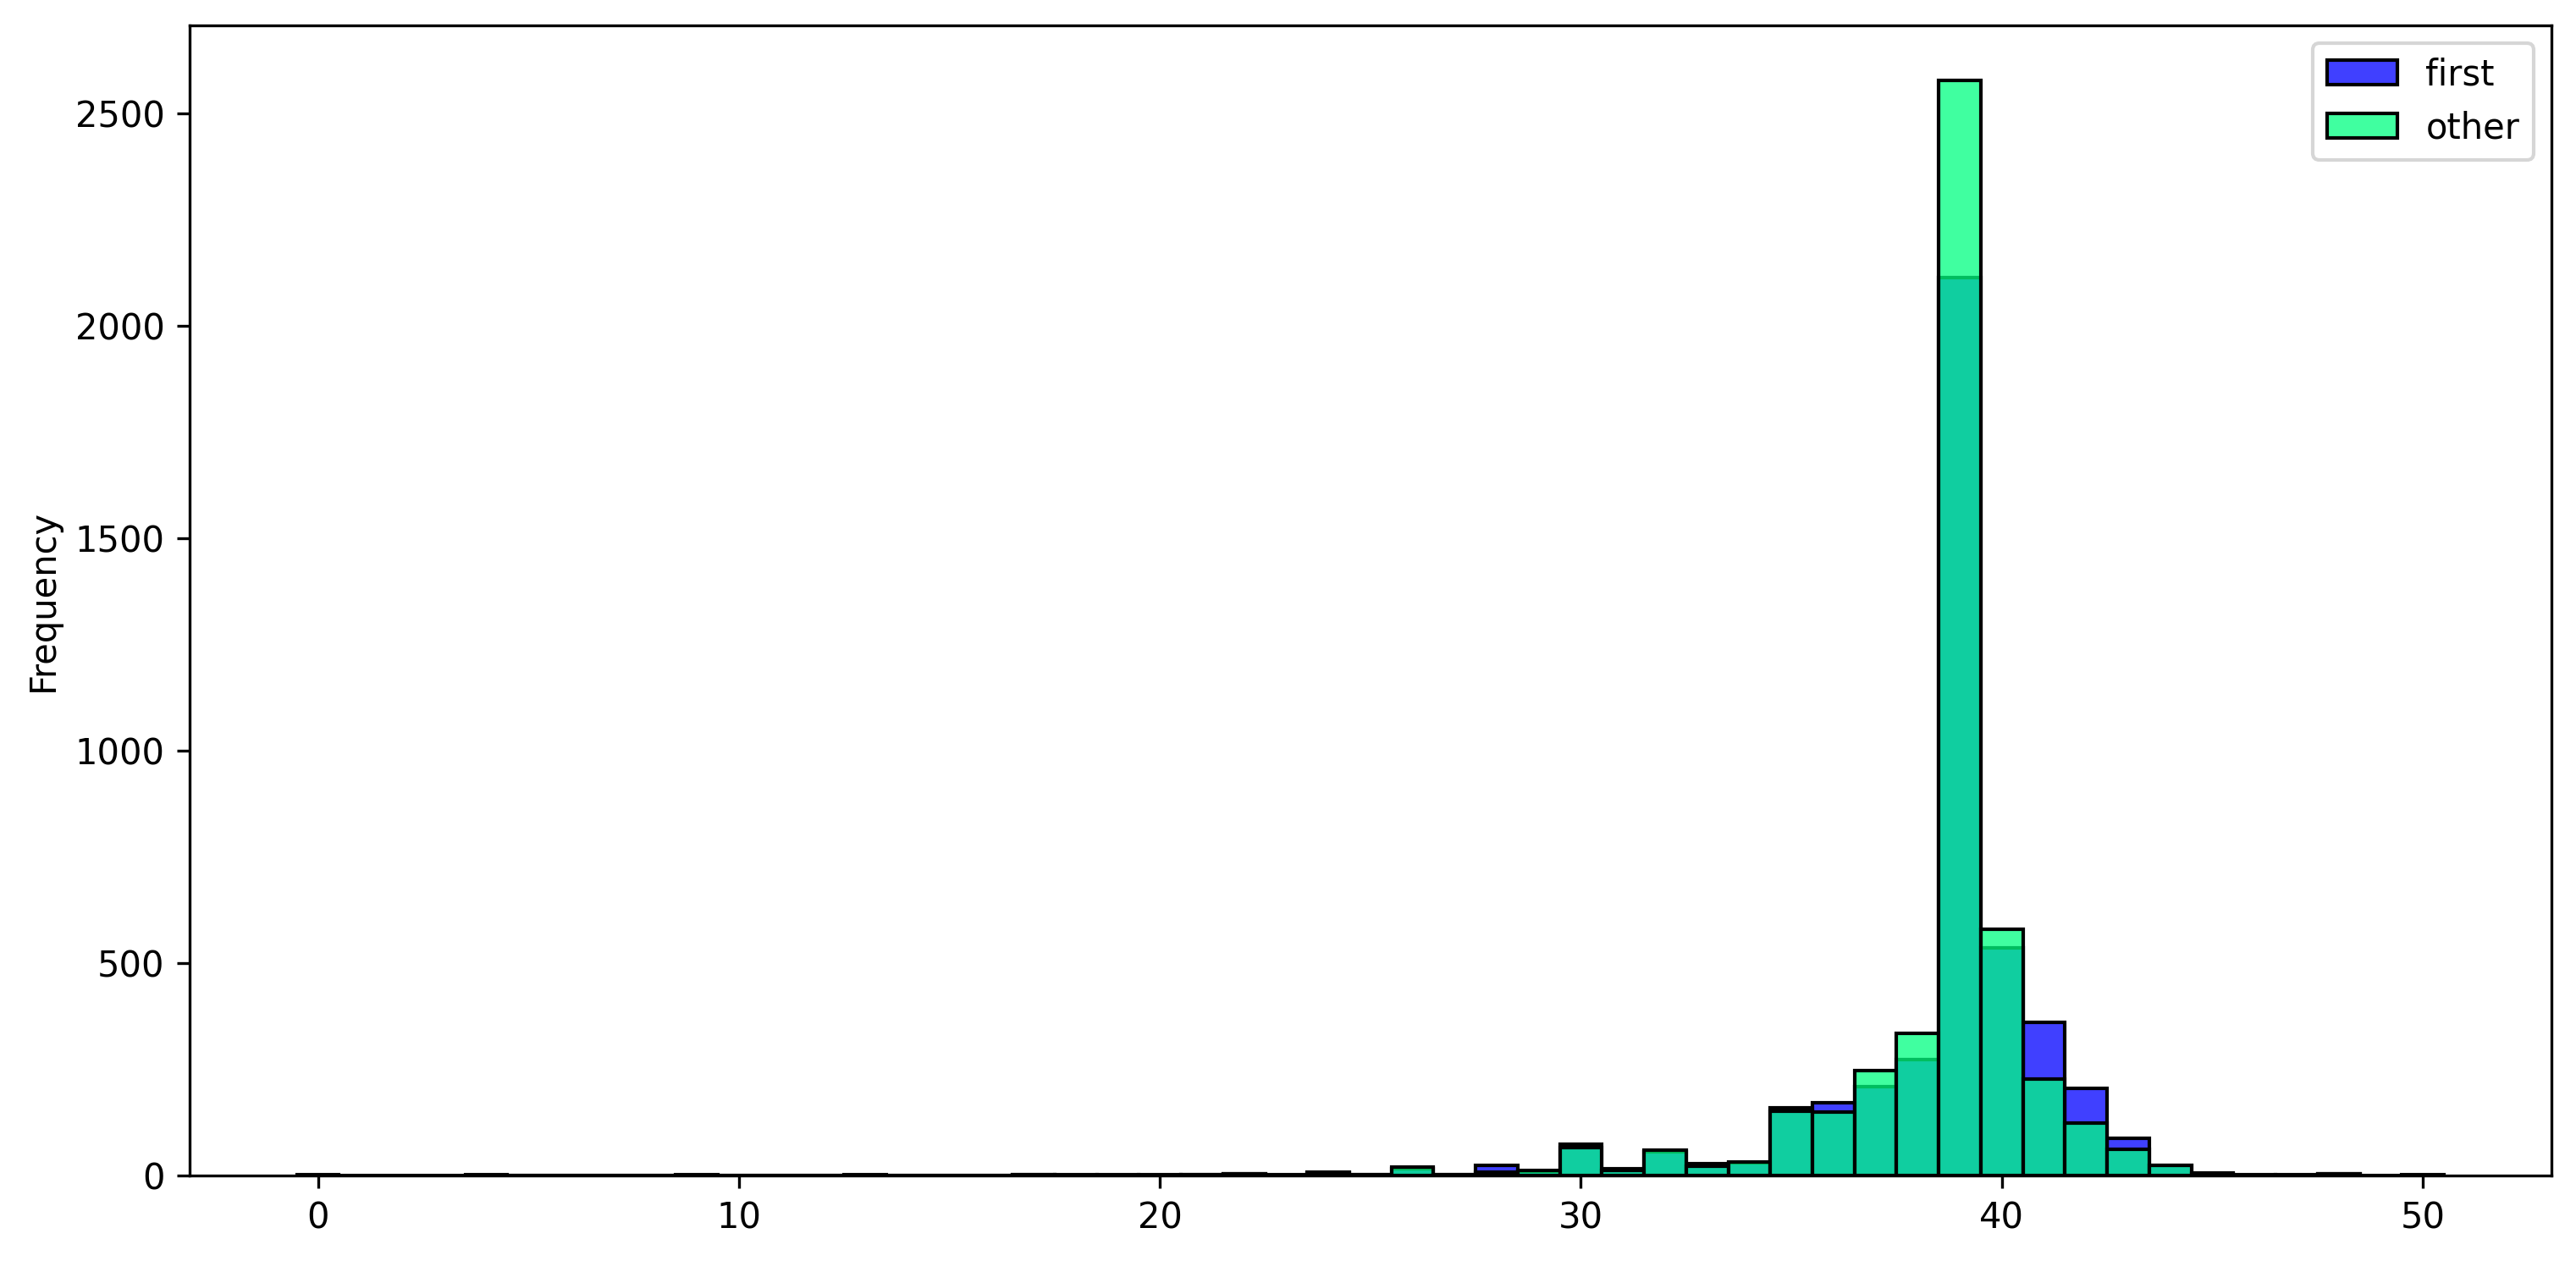

In [14]:
compare_hist(firsts.prglngth.to_list(),
             others.prglngth.to_list(),
             multiple='dodge',
             labels=['first', 'other'])

#### summary statics

average pregnancy length in weeks for first bay and other babies

In [14]:
mean(firsts.prglngth, axis=None), mean(others.prglngth, axis=None)

(38.60095173351461, 38.52291446673706)

In [15]:
median(firsts.prglngth), median(others.prglngth)

(39, 39)

In [19]:
var(firsts.prglngth), var(others.prglngth)

(7.794713509229203, 6.842683519298484)

In [20]:
std(firsts.prglngth), std(others.prglngth)

(2.7919014146687204, 2.6158523504392375)

In [21]:
mad_from_median(firsts.prglngth), mad_from_median(others.prglngth)

(0, 0)

In [16]:
trimmed_mean(firsts.prglngth, n=100), trimmed_mean(others.prglngth, n=100)

(38.74982197958699, 38.66460859977949)

In [17]:
mean(firsts.prglngth, axis=None) - mean(others.prglngth, axis=None)

0.07803726677754952

cohen's effect size between pregnancy length for first and other pregnancies

In [18]:
cohen_effect_size(firsts.prglngth, others.prglngth)

0.028879044654449834

In [22]:
firsts_pmf = Pmf(firsts.prglngth)
others_pmf = Pmf(others.prglngth)

In [24]:
firsts_pmf.normalize()

1.0

In [25]:
firsts_pmf.d

{39: 0.47903920235667347,
 40: 0.12145932472241106,
 41: 0.08157715839564922,
 38: 0.0616360752322683,
 37: 0.04713346929526399,
 42: 0.04645365964196692,
 36: 0.03897575345569907,
 35: 0.03602991162474507,
 43: 0.01971447994561523,
 30: 0.016542034896895538,
 32: 0.012463176977113076,
 34: 0.006571493315205076,
 33: 0.0063448900974393836,
 28: 0.005438477226376614,
 44: 0.005211874008610923,
 26: 0.0036256514842510764,
 31: 0.003399048266485384,
 29: 0.0020394289598912306,
 24: 0.0015862225243598459,
 45: 0.0013596193065941536,
 48: 0.0006798096532970768,
 22: 0.0006798096532970768,
 20: 0.00022660321776569228,
 27: 0.00022660321776569228,
 0: 0.00022660321776569228,
 21: 0.00022660321776569228,
 17: 0.00022660321776569228,
 25: 0.00022660321776569228,
 47: 0.00022660321776569228,
 23: 0.00022660321776569228,
 46: 0.00022660321776569228}

In [26]:
others_pmf.d

{39: 0.5446673706441394,
 40: 0.12249208025343189,
 38: 0.07074973600844772,
 37: 0.05216473072861668,
 41: 0.04794086589229145,
 35: 0.032101372756071805,
 36: 0.03146779303062302,
 42: 0.02597676874340021,
 30: 0.013727560718057022,
 43: 0.012882787750791975,
 32: 0.012671594508975712,
 34: 0.006546990496304118,
 44: 0.004857444561774023,
 33: 0.0044350580781415,
 26: 0.004012671594508976,
 29: 0.0025343189017951427,
 31: 0.0025343189017951427,
 28: 0.001689545934530095,
 24: 0.0012671594508975714,
 45: 0.0008447729672650475,
 48: 0.0008447729672650475,
 22: 0.0008447729672650475,
 25: 0.00042238648363252375,
 27: 0.00042238648363252375,
 50: 0.00042238648363252375,
 18: 0.00021119324181626187,
 4: 0.00021119324181626187,
 9: 0.00021119324181626187,
 19: 0.00021119324181626187,
 17: 0.00021119324181626187,
 13: 0.00021119324181626187,
 21: 0.00021119324181626187}

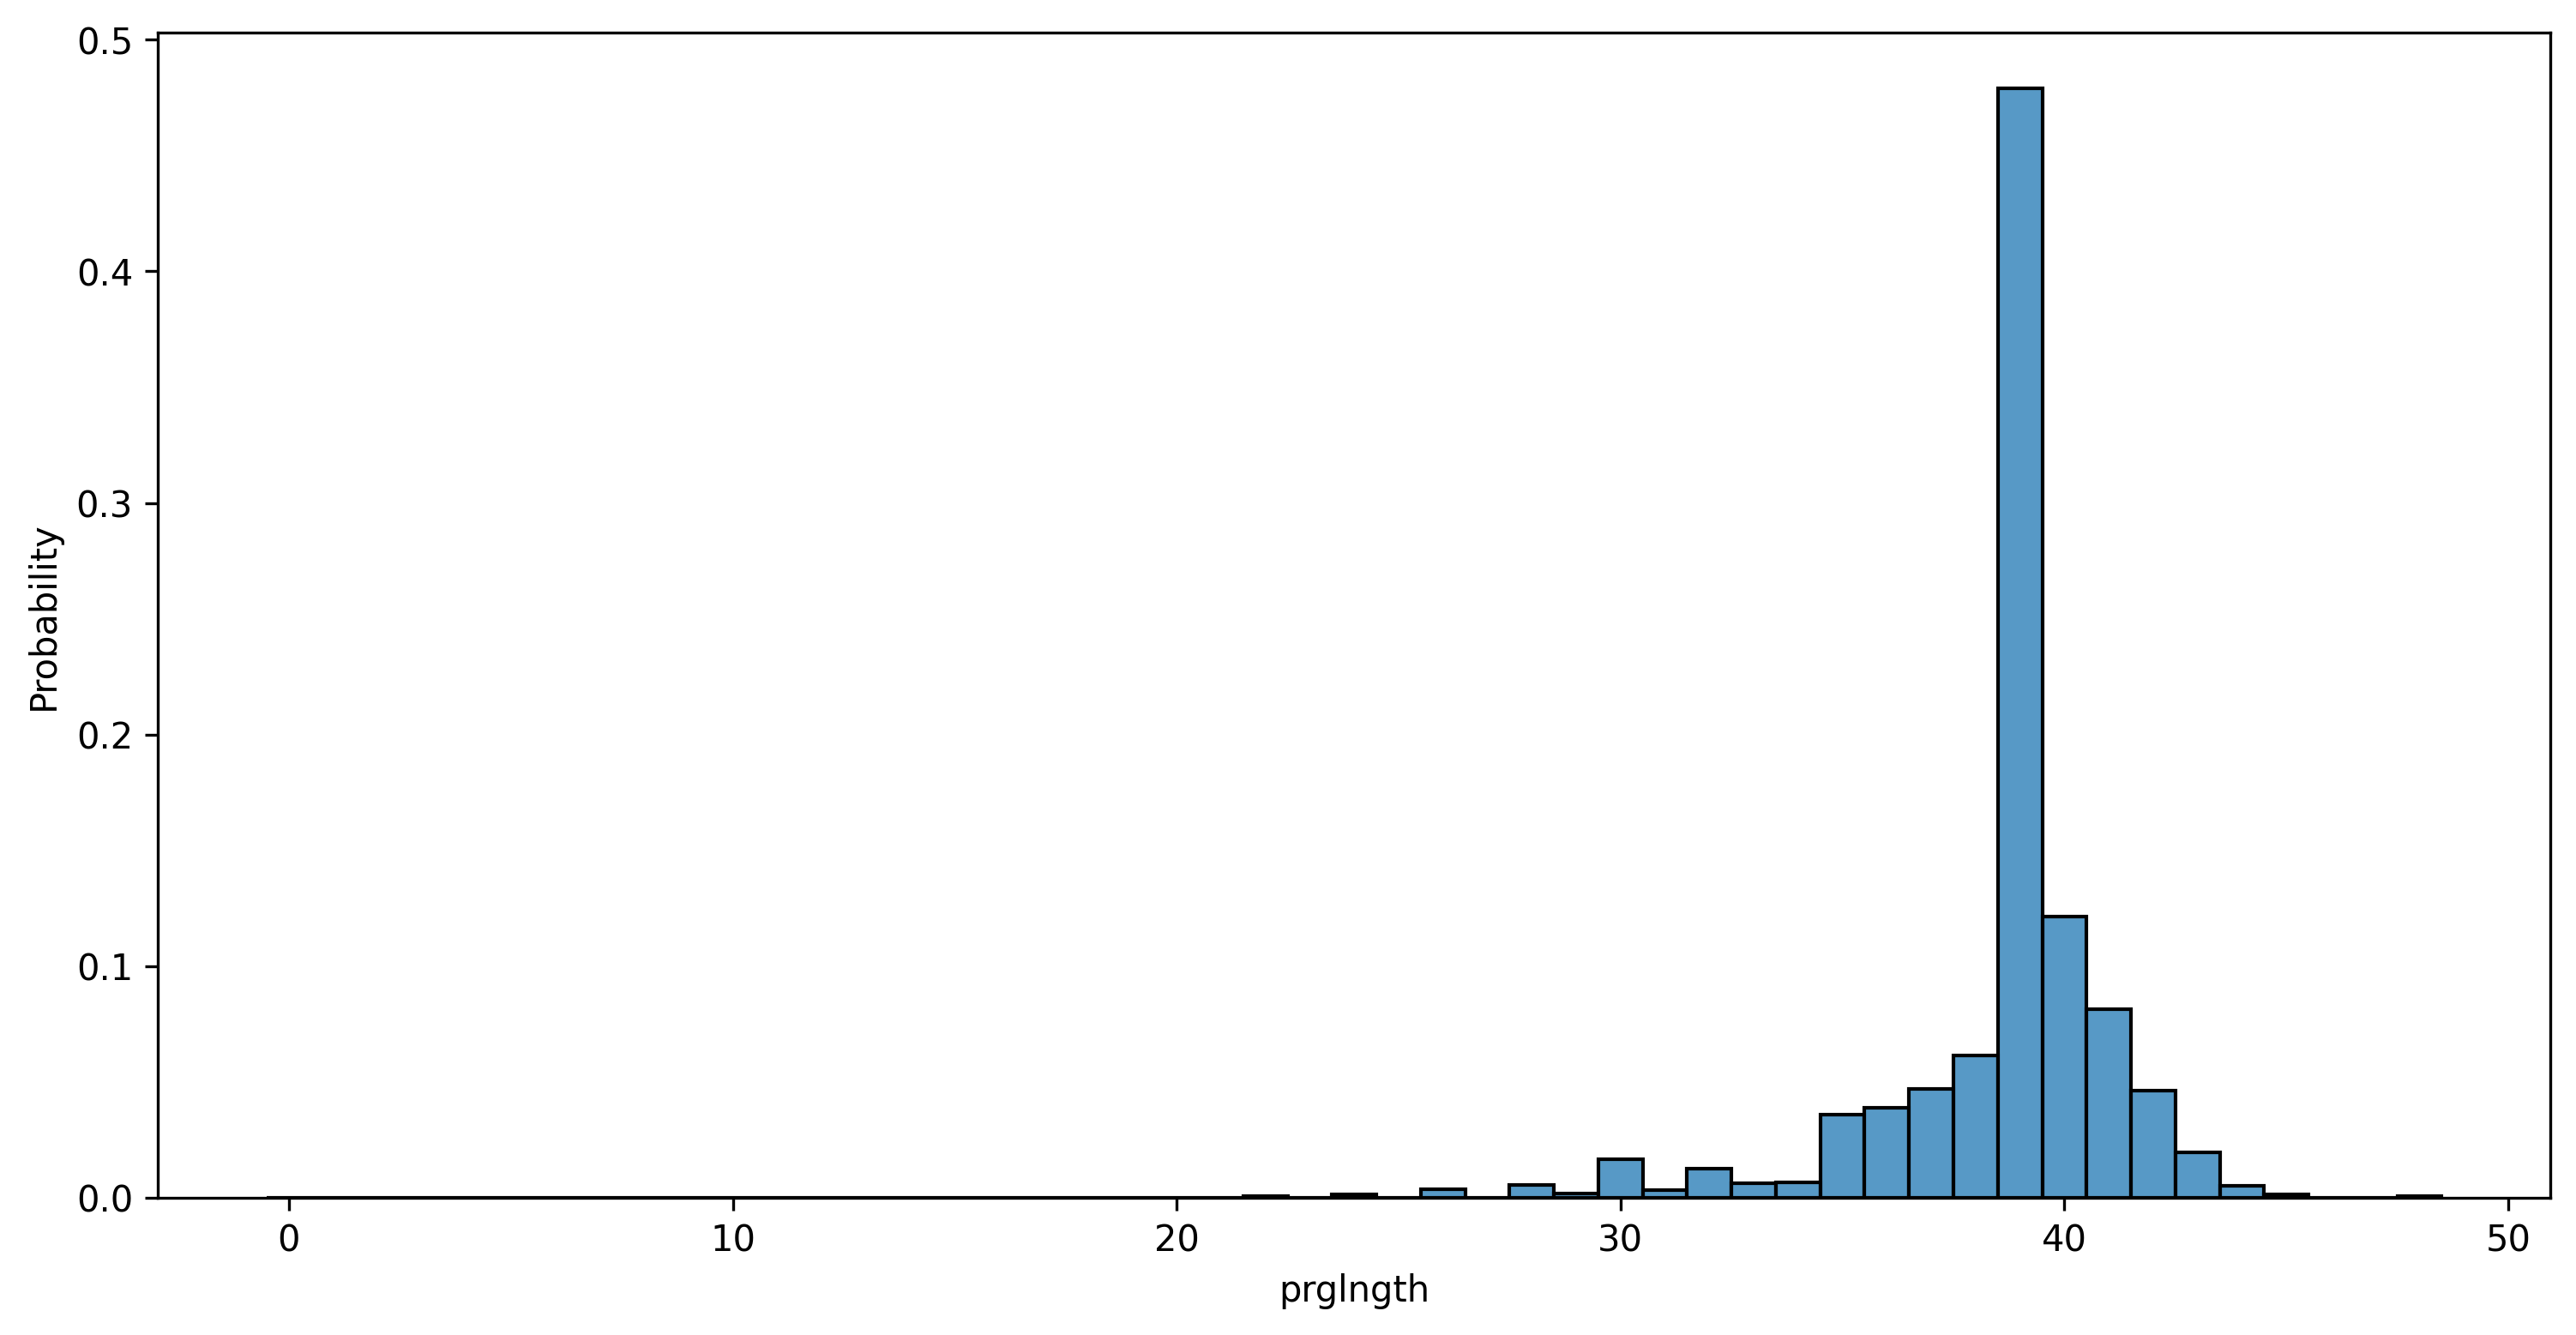

In [15]:
plot_pmf(firsts.prglngth, element='bars')

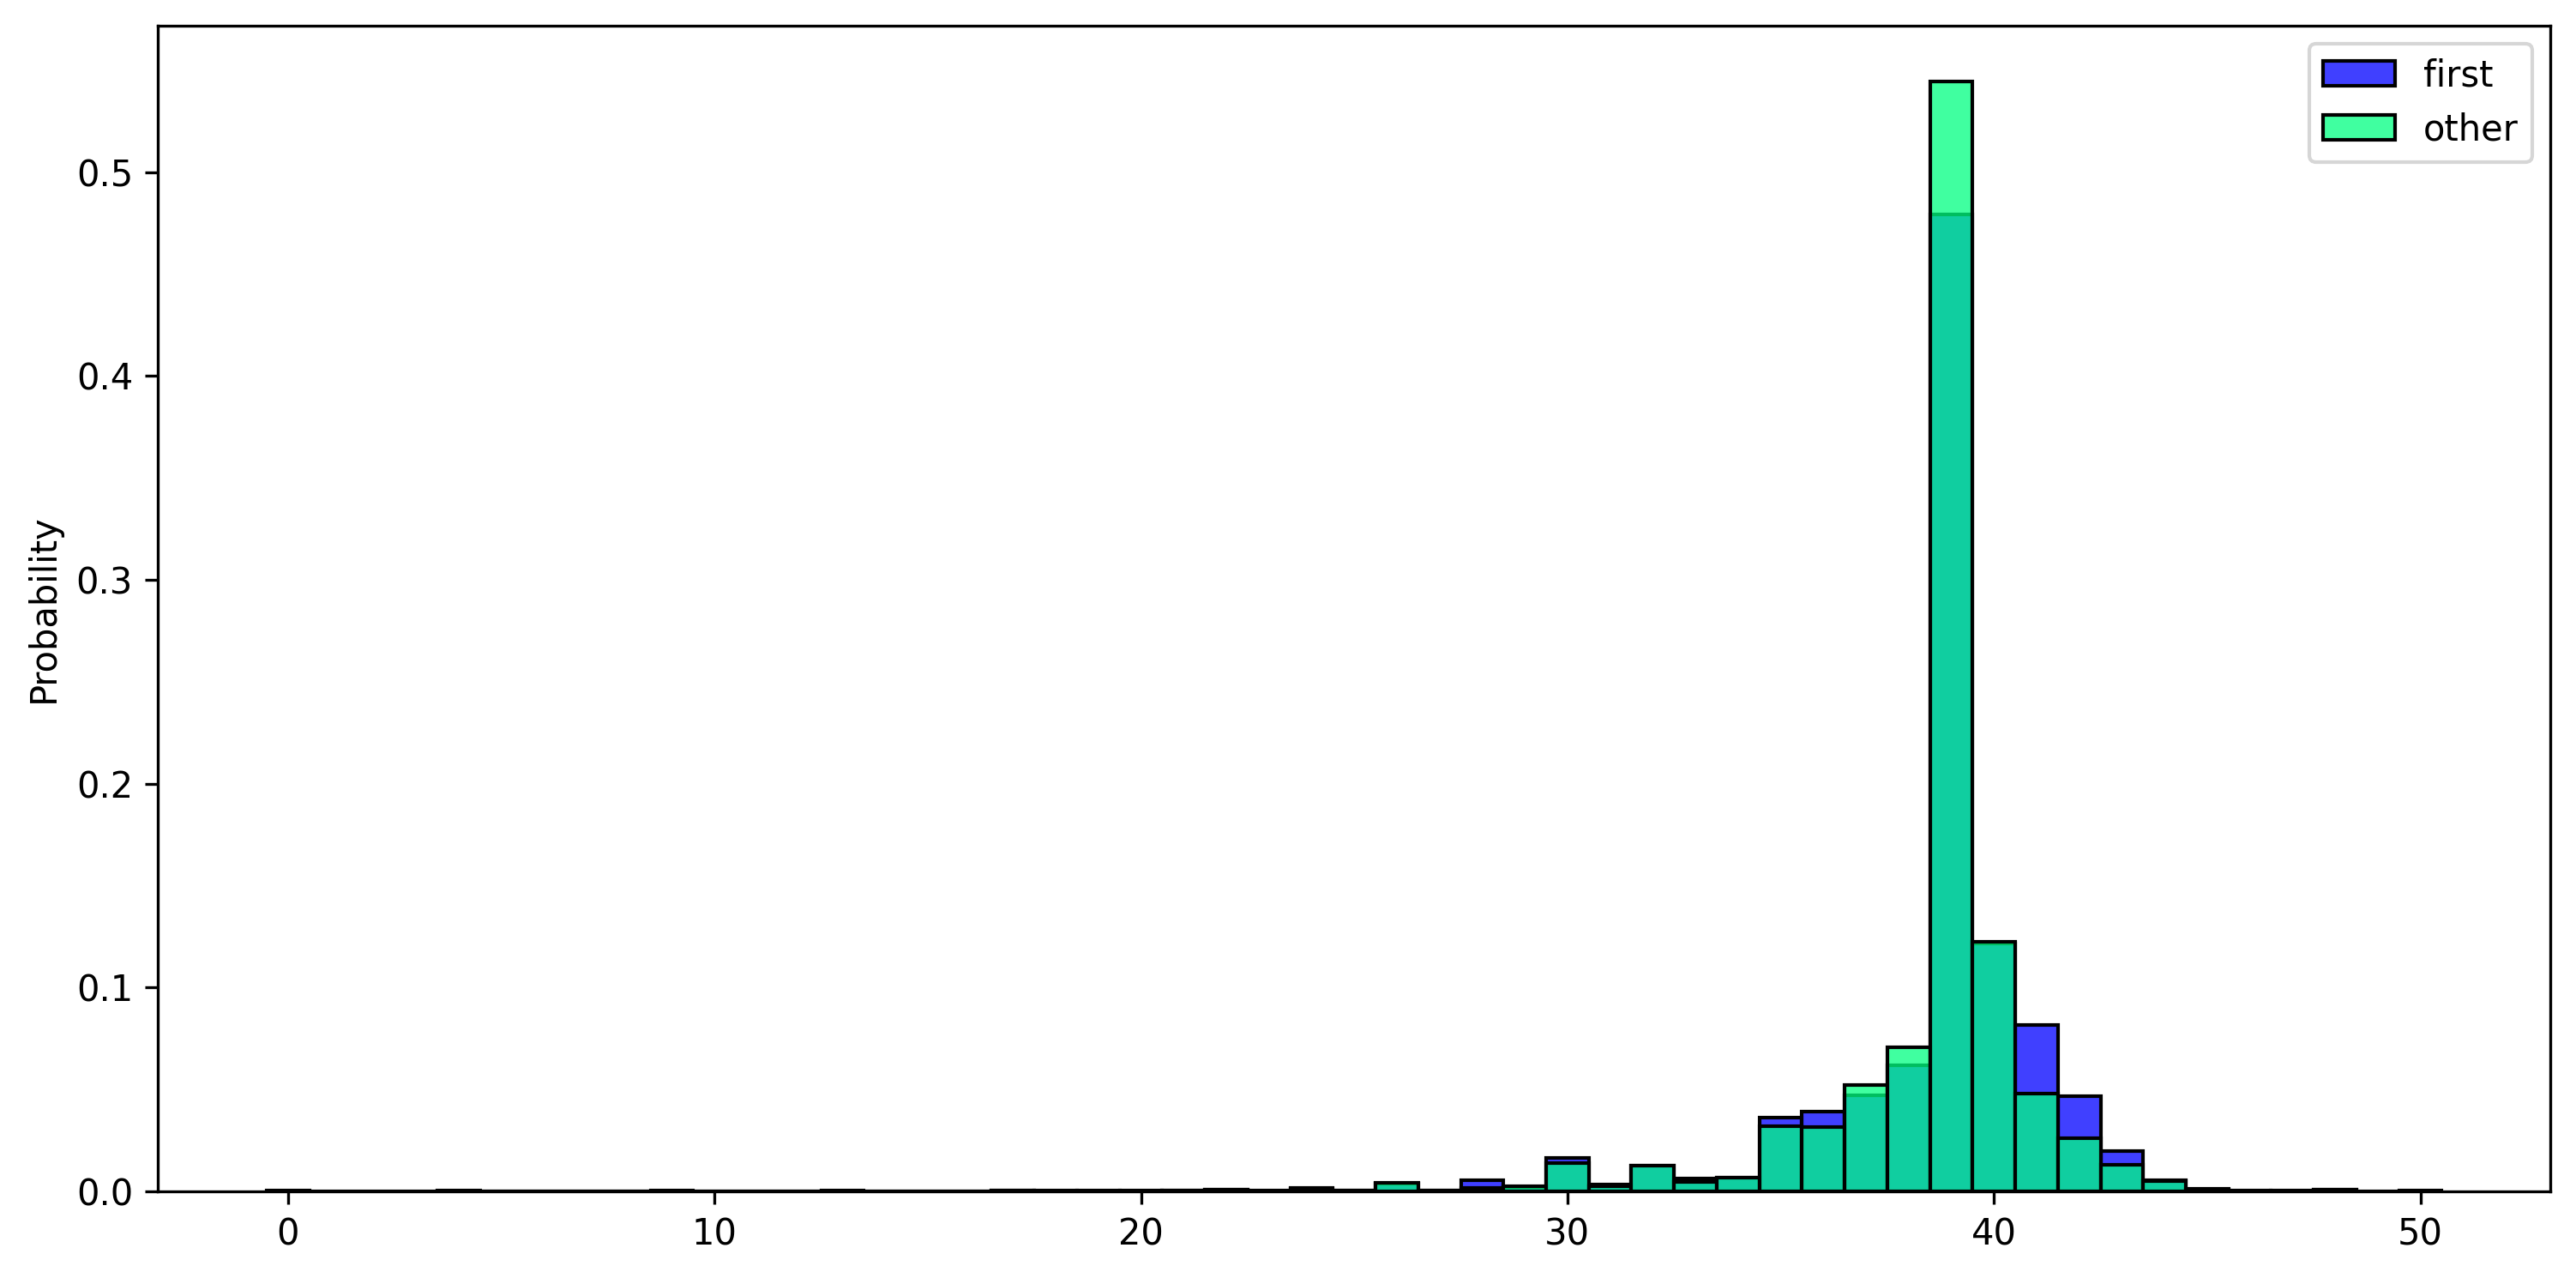

In [16]:
compare_pmf(firsts.prglngth.to_list(),
            others.prglngth.to_list(),
            multiple='dodge',
            labels=['first', 'other'],
            element='bars')

In [20]:
obj = live.totalwgt_lb.dropna()

In [22]:
bins = np.histogram_bin_edges(obj, bins='auto')
quantile = pd.cut(obj, bins)

In [31]:
frqs = obj.groupby(quantile).count()/ len(obj)
frqs = frqs.sort_index().to_dict()
frqs

{Interval(0.125, 0.281, closed='right'): 0.0,
 Interval(0.281, 0.437, closed='right'): 0.00011022927689594356,
 Interval(0.437, 0.592, closed='right'): 0.0002204585537918871,
 Interval(0.592, 0.748, closed='right'): 0.0002204585537918871,
 Interval(0.748, 0.904, closed='right'): 0.0,
 Interval(0.904, 1.06, closed='right'): 0.0002204585537918871,
 Interval(1.06, 1.215, closed='right'): 0.0006613756613756613,
 Interval(1.215, 1.371, closed='right'): 0.0005511463844797178,
 Interval(1.371, 1.527, closed='right'): 0.0012125220458553791,
 Interval(1.527, 1.683, closed='right'): 0.0008818342151675485,
 Interval(1.683, 1.839, closed='right'): 0.0006613756613756613,
 Interval(1.839, 1.994, closed='right'): 0.00033068783068783067,
 Interval(1.994, 2.15, closed='right'): 0.0012125220458553791,
 Interval(2.15, 2.306, closed='right'): 0.0012125220458553791,
 Interval(2.306, 2.462, closed='right'): 0.0011022927689594356,
 Interval(2.462, 2.617, closed='right'): 0.0007716049382716049,
 Interval(2.61

In [43]:
np.cumsum(obj.groupby(quantile).count()/ len(obj))

totalwgt_lb
(0.125, 0.281]      0.000000
(0.281, 0.437]      0.000110
(0.437, 0.592]      0.000331
(0.592, 0.748]      0.000551
(0.748, 0.904]      0.000551
                      ...   
(50.596, 50.752]    0.999780
(50.752, 50.908]    0.999780
(50.908, 51.063]    0.999780
(51.063, 51.219]    0.999780
(51.219, 51.375]    0.999890
Name: totalwgt_lb, Length: 329, dtype: float64

## Do first babies arrive late?

as in above calculations and visualizations suggest that there is a slight difference in pregnancy length of first baby and other pregnancy. average pregnancy length in weeks respectively 38.6001 and 38.523 in weeks for first baby and others. so difference between these averages is 0.078 which is approximately 13 hours. so it's suggest that difference between pregnancy length of first baby and others is negligible.